<a href="https://colab.research.google.com/github/HARSHITMODI007/coursera-test/blob/main/whitewinequalitycheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inroduction to Data Science (Term Project)**
## **Predicting the quality of white wine based on its physicochemical properties**
# Team Members:
# >>HARSHIT MODI(20UCC047)
# >>SARTHAK GOYAL(20UCC096)
# >>GURDEEP SINGH(20ucc43)
# >>PADMANABH PALLIWAL(20ucc73)
**# Dataset: archive.ics.uci.edu**

In [97]:
## Uploading dataset directly from hard drive
from google.colab import files
upload = files.upload()
     

Saving whitwineee.csv to whitwineee (2).csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv('whitwineee.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
bins = [0, 5, 10]
df['quality'] = pd.cut(df['quality'], bins = bins, labels = ['Bad', 'Good'])

In [ ]:
df['quality']

0       Good
1       Good
2       Good
3       Good
4       Good
        ... 
4893    Good
4894     Bad
4895    Good
4896    Good
4897    Good
Name: quality, Length: 4898, dtype: category
Categories (2, object): ['Bad' < 'Good']

# **DATA VISUALIZATION**

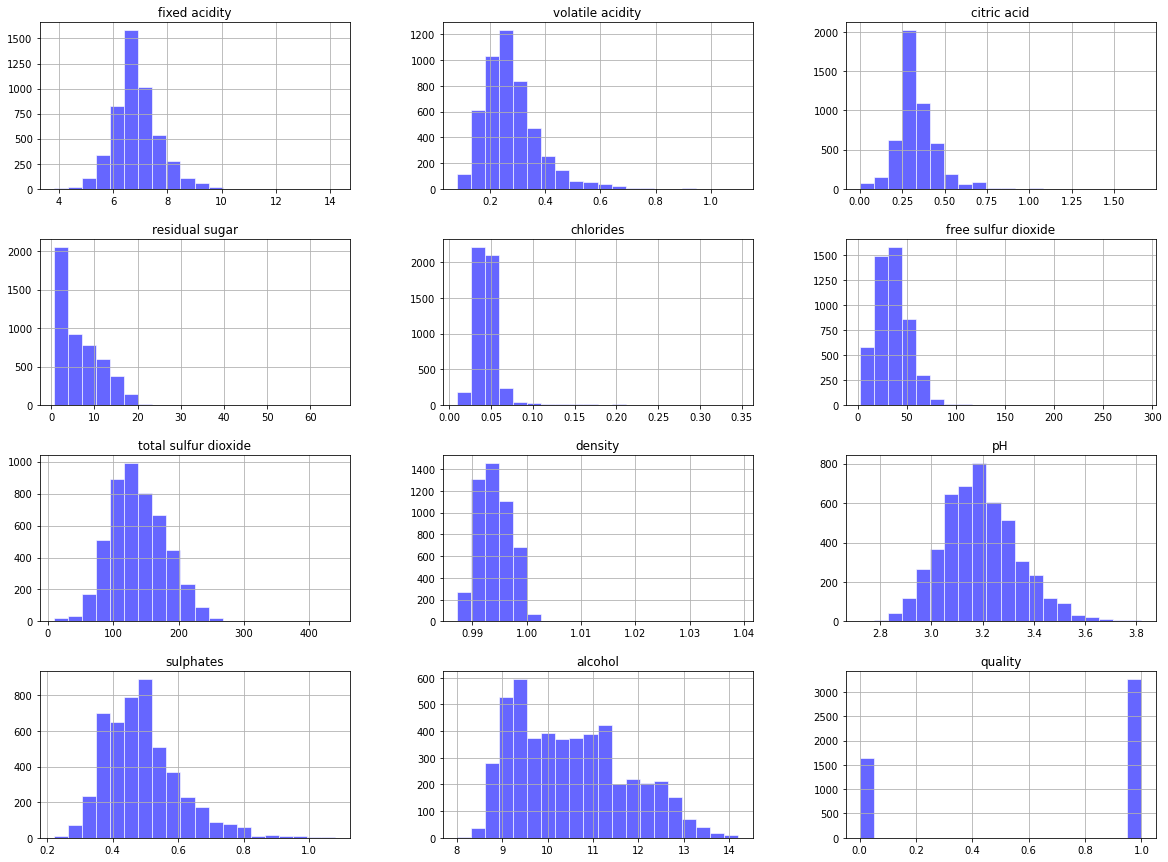

In [ ]:
df.hist(figsize=(20,15), ec="white", bins=20, color='blue', alpha=0.6)
plt.show()

**This graph gives the histogram plots for each attributes in our dataset. It tells us the count of appearances of each value in each of the attributes. The x-values gives the range of values of the particular attribute and the y-values gives the count of each range.=**

<Figure size 720x360 with 0 Axes>

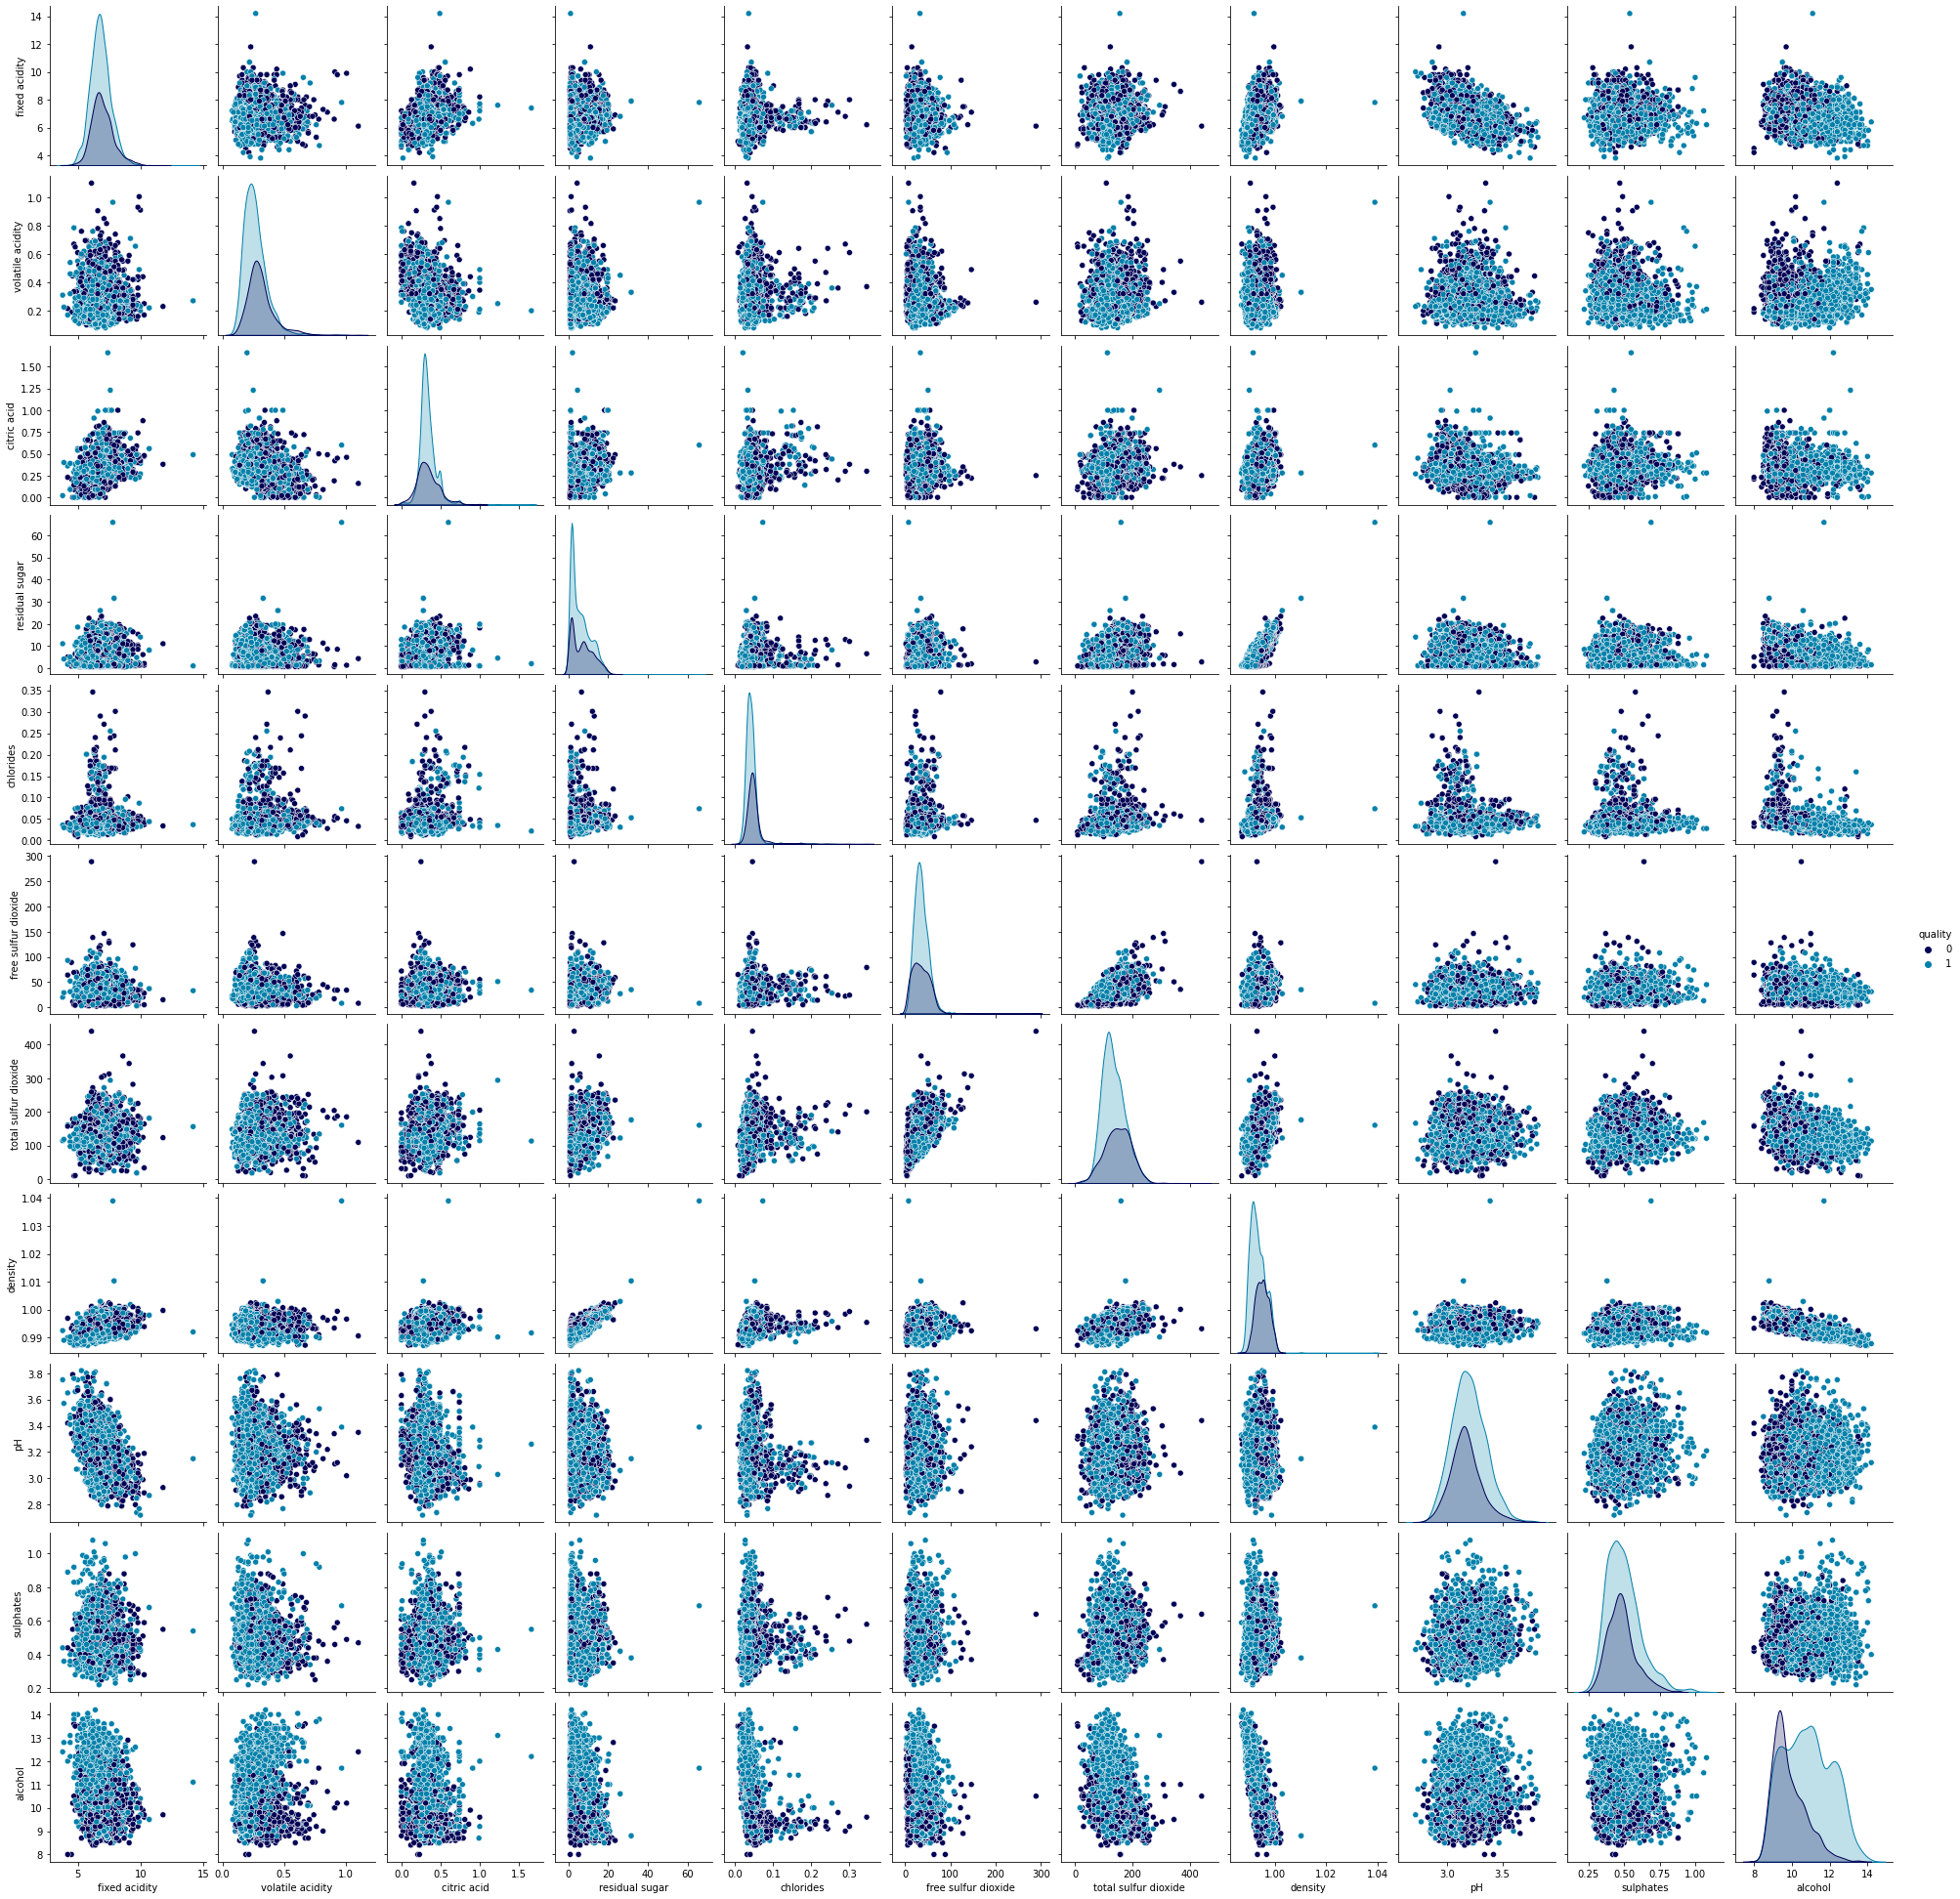

In [ ]:
plt.figure(figsize=(10,5))
sns.pairplot(df, hue="quality", palette="ocean",diag_kind="kde")

**Above is a pairplot for the whole dataset. It gives the relation between each of the attributes with one another through scatter plots. And it also gives the kde plot of each attribute. The dark blue squares represent the bad wine quality or 0 and the light blue squares represent good wine quality or 1. The scatter plot gives the relation of two attributes one on the x-axis and other on the y. Each scatter plot can be studied thoroughly to gain more insights on attributes relationship**















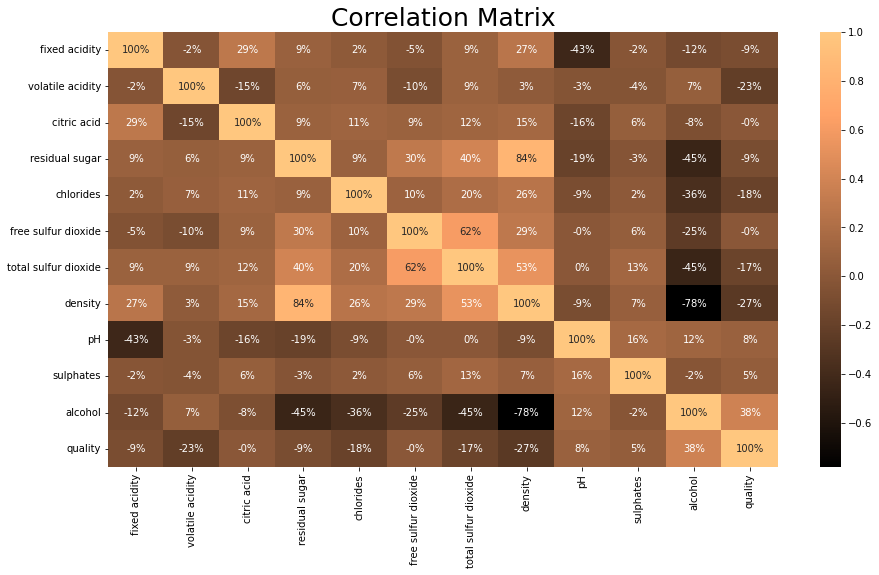

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,fmt=".0%",cmap='copper')
plt.title('Correlation Matrix',size=25)
plt.show()

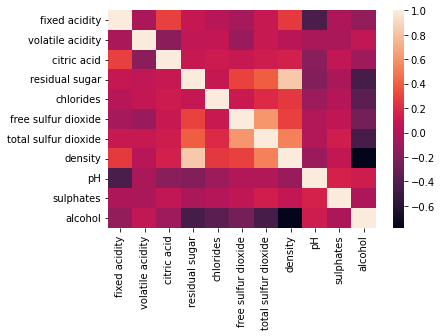

In [ ]:
sns.heatmap(df.corr())

# **DATA PREPROCESSING**

In [ ]:
df['quality'].value_counts()

Good    3258
Bad     1640
Name: quality, dtype: int64

In [ ]:
label_encoder = LabelEncoder()
df['quality'] = label_encoder.fit_transform(df['quality'])

In [ ]:
df['quality']

0       1
1       1
2       1
3       1
4       1
       ..
4893    1
4894    0
4895    1
4896    1
4897    1
Name: quality, Length: 4898, dtype: int64

In [ ]:
X = df.drop(['quality'], axis=1)
y = df.loc[:,['quality']]
     

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [ ]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (3918, 11)
X_test shape (980, 11)
y_train shape (3918, 1)
y_test shape (980, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_1 = StandardScaler()
scaler_2 = StandardScaler()
X_train = scaler_1.fit_transform(X_train)
X_test = scaler_2.fit_transform(X_test)
     

# **Prediction Algorithms**
## **Logistic Regression**

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
y_prediction = LR_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
score = accuracy_score(y_test, y_prediction)
print("Accuracy: ", score*100, "%")

Accuracy:  73.67346938775509 %


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

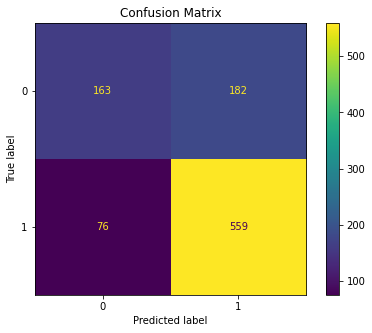

In [ ]:
class_names = [0,1]
fig,ax = plt.subplots(figsize=(7,5))
plot_confusion_matrix(LR_model, X_test, y_test, labels=class_names, ax=ax)
plt.title('Confusion Matrix')

## **Decision Tree Classifier**

In [ ]:
print("DecisionTreeClassifier")

DecisionTreeClassifier


In [ ]:
DTC_model = DecisionTreeClassifier()
DTC_model.fit(X_train, y_train)
y_prediction = DTC_model.predict(X_test)
     

In [ ]:
score = accuracy_score(y_test, y_prediction)
print("Accuracy: ", score*100, "%")

Accuracy:  74.48979591836735 %


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

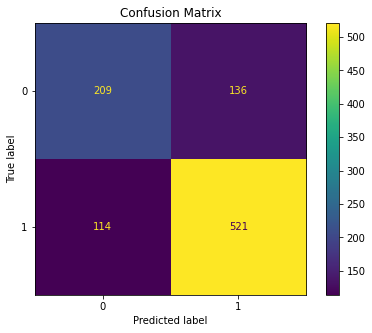

In [ ]:
class_names = [0,1]
fig,ax = plt.subplots(figsize=(7,5))
plot_confusion_matrix(DTC_model, X_test, y_test, labels=class_names, ax=ax)
plt.title('Confusion Matrix')

## **RANDOM FOREST CLASSIFIER**

In [ ]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
y_prediction = RF_model.predict(X_test)
     

<ipython-input-54-b2458e56e18e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(X_train, y_train)


In [ ]:
score = accuracy_score(y_test, y_prediction)
print("Accuracy: ", score*100, "%")

Accuracy:  80.71428571428572 %


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

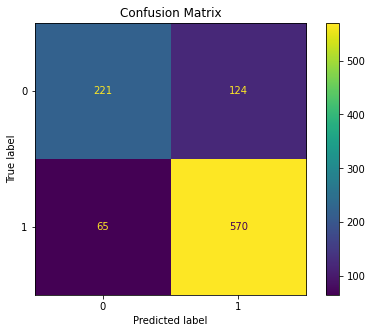

In [ ]:
class_names = [0,1]
fig,ax = plt.subplots(figsize=(7,5))
plot_confusion_matrix(RF_model, X_test, y_test, labels=class_names, ax=ax)
plt.title('Confusion Matrix')
     

## **SUPPORT VECTOR MACHINE**

In [ ]:
SVM_model = SVC()
SVM_model.fit(X_train, y_train)
y_prediction = SVM_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
score = accuracy_score(y_test, y_prediction)
print("Accuracy: ", score*100, "%")

Accuracy:  76.53061224489795 %


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

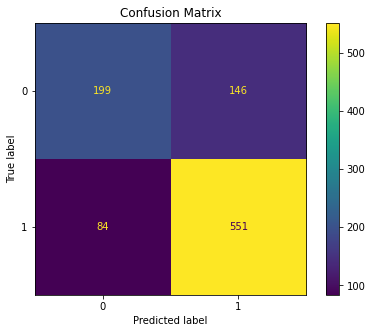

In [ ]:
class_names = [0,1]
fig,ax = plt.subplots(figsize=(7,5))
plot_confusion_matrix(SVM_model, X_test, y_test, labels=class_names, ax=ax)
plt.title('Confusion Matrix')

## **NAIVE BAYES CLASSIFIER**

In [ ]:
NBC_Model = GaussianNB()
NBC_Model.fit(X_train, y_train)
y_prediction = NBC_Model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
score = accuracy_score(y_test, y_prediction)
print('Accuracy:', score*100, "%")

Accuracy: 68.26530612244898 %


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

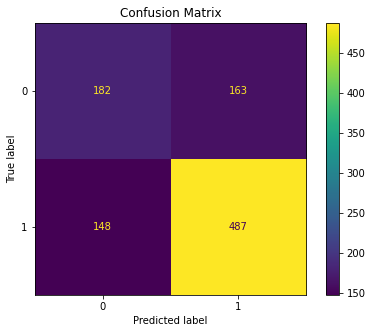

In [ ]:
class_names = [0,1]
fig,ax = plt.subplots(figsize=(7,5))
plot_confusion_matrix(NBC_Model, X_test, y_test, labels=class_names, ax=ax)
plt.title('Confusion Matrix')

### **Hence Random Forest Algorithm gives the best accuracy score.**

### **LET's EVALUATE THE CROSS VALIDATION SCORES**

In [ ]:
def CrossValidationScore(model_list):
    global X,y
    
    mean = []
    modelname = []
    
    for model in model_list:
        modelname.append(type(model).__name__)
        
    for i in model_list:
        scores = cross_val_score(i, X, y, cv=5)
        mean.append(scores.mean())
        
    cvs = pd.DataFrame({"Model Name":modelname,"CVS":mean})
    return cvs.style.background_gradient("Greens")

In [ ]:
model_list=[LR_model,DTC_model,RF_model,SVM_model,NBC_Model]

In [ ]:
CrossValidationScore(model_list)

,Model Name,CVS
0,LogisticRegression,0.734389
1,DecisionTreeClassifier,0.662330
2,RandomForestClassifier,0.756846
3,SVC,0.663537
4,GaussianNB,0.692531
